In [1]:
import pandas as pd

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')

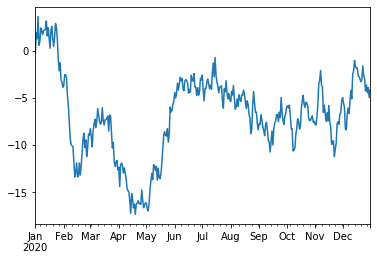

In [3]:
# the year of random datas.
year = 2020

d1 = datetime.date(year,1,1)
d2 = datetime.date(year+1,1,1)
dd = d2 - d1

ts = pd.Series(np.random.randn(
    dd.days), index=pd.date_range(d1, periods=dd.days))
ts = ts.cumsum()
ts.plot()

## Resolve Chinese Display Issue

In [4]:
plt.rcParams['font.sans-serif']=['Microsoft Yahei']  # Fix Chinese unrecognized issue 
plt.rcParams['axes.unicode_minus']=False # Fix Minus Sign unrecognized issue

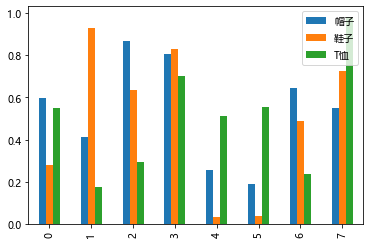

In [5]:
df2 = pd.DataFrame(np.random.rand(8, 3), columns=['帽子', '鞋子', 'T恤'])
df2.plot.bar()

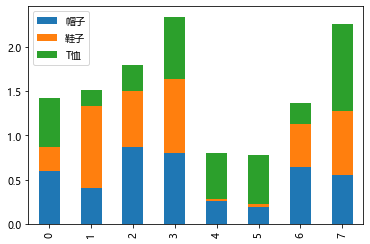

In [6]:
df2.plot.bar(stacked=True);

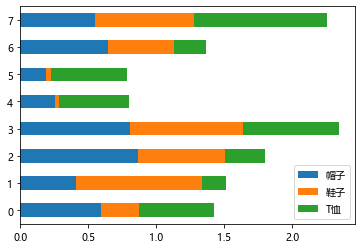

In [7]:
df2.plot.barh(stacked=True);

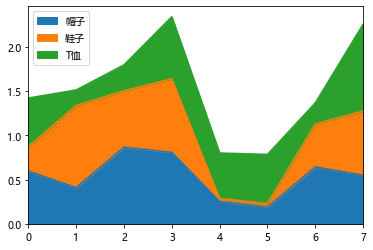

In [8]:
df2.plot.area();

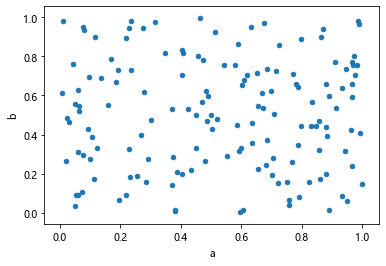

In [9]:
df = pd.DataFrame(np.random.rand(150, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

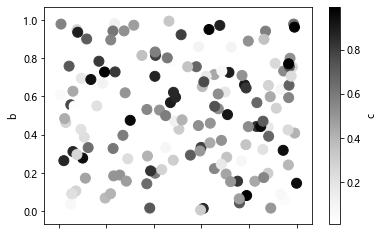

In [10]:
df.plot.scatter(x='a', y='b', c='c', s=100);

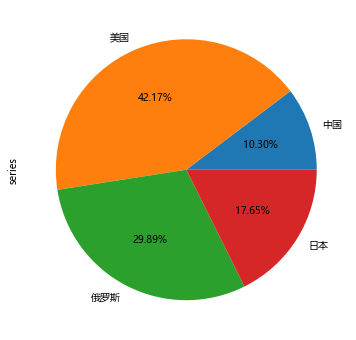

In [11]:
series = pd.Series(3 * np.random.rand(4),index=['中国', '美国', '俄罗斯', '日本'], name='series')
series.plot.pie(figsize=(6, 6), autopct='%.2f%%')

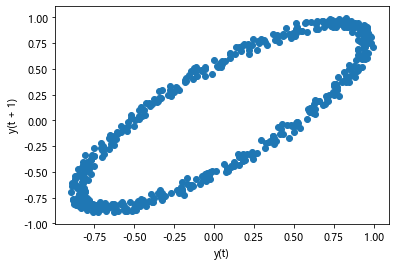

In [12]:
from pandas.plotting import lag_plot
plt.figure()
spacing = np.linspace(-50 * np.pi, 50 * np.pi, num=500)
data = pd.Series(0.1 * np.random.rand(500) + 0.9 * np.sin(spacing))
lag_plot(data)

## Use matplotlib display

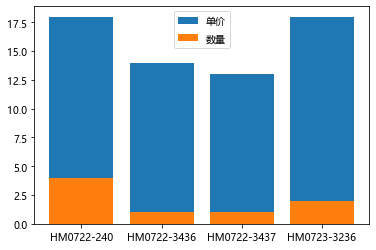

In [13]:
csv = pd.read_csv("sample.csv")

#print(csv.型号.values)
#print(csv.单价.values)

display_num = 5

x = csv.型号.values[0:display_num]
y1 = csv.单价.values[0:display_num]
y2 = csv.数量.values[0:display_num]

fig, ax = plt.subplots()

ax.bar(x, y1, label="单价")
ax.bar(x, y2, label="数量")

#ax.plot(x, y1, label="单价")
#ax.plot(x, y2, label="数量")
ax.legend()

plt.show()